# ImageView package - a GUI to display images with Julia

ImageView provides a GUI to display images and movie with Julia. You can use several options to flip the image, change the contrast or visualizing several images on the same 


## Dependencies :
The following dependencies are required to run ImageView :
- Images : already in the default packages 
- TestImages : provides a set of standard images. It contains the classical images used in signal processing (Lena). 


In [1]:
using Images, TestImages, ImageView

We can load a standard image from TestImages with the following command :

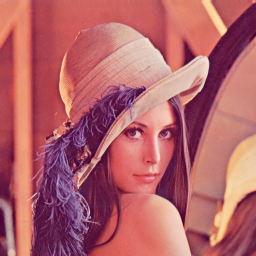

In [4]:
img1=testimage("lena_color_256")

**NB:**In the notebook, the images are automatically displayed, but it is not the case if you run Julia from the command line. So ImageView is more useful.
Now lets display this images using ImageView :

In [5]:
typeof(img1)

Image{RGB{UfixedBase{Uint8,8}},2,Array{RGB{UfixedBase{Uint8,8}},2}} (constructor with 1 method)

In [8]:
disp_img=view(img1)

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,256.0,0.0,256.0))

This should open a window displaying the image.
Now you can zoom on the image by dragging a box with the mouse, and come back to the initial view with a double clic.
The view command has an option "pixelspacing" to change the dimension of the image.

In [9]:
img1["pixelspacing"] #The pixel ratio of the image is [1,1]

2-element Array{Int64,1}:
 1
 1

In [10]:
view(img1,pixelspacing=[1,2])

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,256.0,0.0,256.0))

The proportion of the image is changed. 

In [11]:
typeof(disp_img)

(ImageCanvas,ImageSlice2d{Image{RGB{UfixedBase{Uint8,8}},2,SubArray{RGB{UfixedBase{Uint8,8}},2,Array{RGB{UfixedBase{Uint8,8}},2},(UnitRange{Int64},UnitRange{Int64})}}})

The view command return 2 elements, the ImageCanvas useful for the display and the image itsefl.

We can use the canvas to display several iamges on the same window, it works like matlab "subplot" funciton.
You define a canvas like an array and then use the "view" function and add the position in the canvas as a parameter.

In [12]:
#load the images
img2=testimage("mandrill");
img3=testimage("cameraman");
img4=testimage("lighthouse");

In [16]:
C=canvasgrid(2,2)
view(C[1,1],img1;pixelspacing=[1,1])
view(C[1,2],img2;pixelspacing=[1,1])
view(C[2,1],img3;pixelspacing=[1,1])
view(C[2,2],img4;pixelspacing=[1,1])


(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,768.0,0.0,512.0))

We can see that the window adapts to the size of the images.
Another interesting possiblity of ImageView is that you can flip the image or shift the axis :

In [22]:
view(img1,flipy=true); #flip the image
view(img1,xy=["y","x"]);#exchange the x and y axis

If you load a gray scale image you can change the contrast easily by right clicking on the display window.

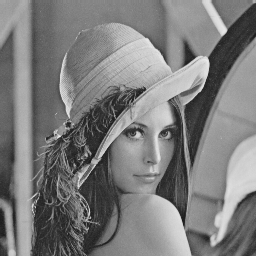

In [23]:
img_gray=testimage("lena_gray_256")

In [25]:
view(img_gray)

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,256.0,0.0,256.0))

error during Tk callback: 

ERROR: `display` has no method matching display(::Canvas, ::FramedPlot)
 in rerender at C:\Users\Maxime\.julia\v0.3\ImageView\src\contrast.jl:95
 in setrange at C:\Users\Maxime\.julia\v0.3\ImageView\src\contrast.jl:229
 in contrastgui at C:\Users\Maxime\.julia\v0.3\ImageView\src\contrast.jl:111
 in contrastgui at C:\Users\Maxime\.julia\v0.3\ImageView\src\contrast.jl:28
 in anonymous at C:\Users\Maxime\.julia\v0.3\ImageView\src\display.jl:313
 in jl_tcl_callback at C:\Users\Maxime\.julia\v0.3\Tk\src\tkwidget.jl:146
 in tcl_doevent at C:\Users\Maxime\.julia\v0.3\Tk\src\tkwidget.jl:20 (repeats 2 times)
 in anonymous at task.jl:73


**NB:** This option is working only from the command line